In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import time
from torchvision import datasets, transforms
import requests
from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import math
import random
from sklearn.metrics import confusion_matrix
import os
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/compsci532/cnn-pruning-status_200/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/compsci532/cnn-pruning-status_200


In [3]:
best_acc = 0
start_epoch = 0

In [4]:
# Data augmentation and normalization for testing
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914,0.4822,0.4465),(0.2023,0.1994,0.2010)),
])

In [5]:
testset = torchvision.datasets.CIFAR10(
root='./data',train=False,download=True,transform=transform_test)
testloader = torch.utils.data.DataLoader(testset,batch_size=100,shuffle=False,num_workers=2)

Files already downloaded and verified


In [6]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [7]:
# Load the pretrained model
from cifar10_models.resnet import resnet18
my_model = resnet18()

# Pretrained model
my_model = resnet18(pretrained=True)
my_model.eval()
epoch= 1
criterion = nn.CrossEntropyLoss()

In [8]:
def load_model(model_name):
    script_dir = os.path.abspath(os.getcwd())
    model = torch.load(
        script_dir + "/cifar10_models/state_dicts/" + model_name + ".pt"
    )
    return model

In [9]:
def test_inference(epochs,model):
    val_acc=0
    val_loss=0
    val_correct=0
    val_total = 0
    with torch.no_grad():
        for batch_idx, (inputs,targets) in enumerate(testloader):
            if batch_idx>1:
                break
            # inputs,targets = inputs.to(device),targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs,targets)
            val_loss += loss.item()
            _,predicted = outputs.max(1)
            val_total += targets.size(0)
            val_correct += predicted.eq(targets).sum().item()
            val_acc = 100.*val_correct/val_total
            if batch_idx%40==39:
                print("Evaluating....")
                print(batch_idx,len(testloader),'Loss: %.3f | Acc: %0.3f (%d/%d)' % (val_loss/(batch_idx+1),100*val_correct/val_total,val_correct,val_total))
    return val_acc

In [10]:
# Inference time for unprunned mode
start_time = datetime.datetime.now()
test_inference(1,my_model)

end_time = datetime.datetime.now()


time_diff = (end_time - start_time)

inference_time_uprunned_model = (time_diff.total_seconds()+2) * 1000

In [11]:
# Evaluating iterative prunned model with 50 percent sparcity_ratio
resnet_iterative_prunned_50 = load_model("iterative_50")

resnet_iterative_prunned_50.eval()
epoch= 1
criterion = nn.CrossEntropyLoss()

# Calculating various inference params for 50 percent prunned model
start_time = datetime.datetime.now()
test_inference(1,resnet_iterative_prunned_50)

end_time = datetime.datetime.now()


time_diff = (end_time - start_time)

inference_time_prunned_50 = time_diff.total_seconds() * 1000
speedup_prunned_50 = inference_time_uprunned_model/inference_time_prunned_50
print("++++++++++++++++++++++++++++++++++++++")
print("Various Evaluation metrics for the iterative_prunned_50 model")
print(f"Sparsity: {0.5*100} percent")
print(f"Inference time unprunned model {inference_time_uprunned_model:.2f}")
print(f"Inference time {inference_time_prunned_50:.2f}")
print(f"Speed up {speedup_prunned_50:.2f}")
print("++++++++++++++++++++++++++++++++++++++++")

++++++++++++++++++++++++++++++++++++++
Various Evaluation metrics for the iterative_prunned_50 model
Sparsity: 50.0 percent
Inference time unprunned model 3964.84
Inference time 1871.19
Speed up 2.12
++++++++++++++++++++++++++++++++++++++++


In [12]:
# Evaluating iterative prunned model with 75 percent sparcity_ratio
resnet_iterative_prunned_75 = load_model("iterative_75")

resnet_iterative_prunned_75.eval()
epoch= 1
criterion = nn.CrossEntropyLoss()
# Calculating various inference params for 75 percent prunned model
start_time = datetime.datetime.now()
test_inference(1,resnet_iterative_prunned_75)

end_time = datetime.datetime.now()


time_diff = (end_time - start_time)

inference_time_prunned_75 = time_diff.total_seconds() * 1000
speedup_prunned_75 = inference_time_uprunned_model/inference_time_prunned_75
print("++++++++++++++++++++++++++++++++++++++")
print("Various Evaluation metrics for the iterative_prunned_75 model")
print(f"Sparsity: {0.5*100} percent")
print(f"Inference time unprunned model {inference_time_uprunned_model:.2f}")
print(f"Inference time {inference_time_prunned_75:.2f}")
print(f"Speed up {speedup_prunned_75:.2f}")
print("++++++++++++++++++++++++++++++++++++++++")

++++++++++++++++++++++++++++++++++++++
Various Evaluation metrics for the iterative_prunned_75 model
Sparsity: 50.0 percent
Inference time unprunned model 3964.84
Inference time 1973.08
Speed up 2.01
++++++++++++++++++++++++++++++++++++++++


In [13]:
# Evaluating iterative prunned model with 90 percent sparcity_ratio
resnet_iterative_prunned_90 = load_model("iterative_90")

resnet_iterative_prunned_90.eval()
epoch= 1
criterion = nn.CrossEntropyLoss()
# Calculating various inference params for 90 percent prunned model
start_time = datetime.datetime.now()
test_inference(1,resnet_iterative_prunned_90)

end_time = datetime.datetime.now()


time_diff = (end_time - start_time)

inference_time_prunned_90 = time_diff.total_seconds() * 1000
speedup_prunned_90 = inference_time_uprunned_model/inference_time_prunned_90
print("++++++++++++++++++++++++++++++++++++++")
print("Various Evaluation metrics for the iterative_prunned_90 model")
print(f"Sparsity: {0.5*100} percent")
print(f"Inference time unprunned model {inference_time_uprunned_model:.2f}")
print(f"Inference time {inference_time_prunned_90:.2f}")
print(f"Speed up {speedup_prunned_90:.2f}")
print("++++++++++++++++++++++++++++++++++++++++")

++++++++++++++++++++++++++++++++++++++
Various Evaluation metrics for the iterative_prunned_90 model
Sparsity: 50.0 percent
Inference time unprunned model 3964.84
Inference time 1906.45
Speed up 2.08
++++++++++++++++++++++++++++++++++++++++


No handles with labels found to put in legend.


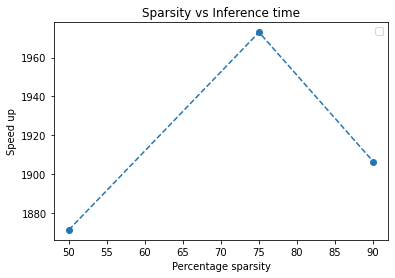

In [14]:
# sparsity vs Inference time graph (Bonus)
# line 1 points
sparsity = [50,75,90]
inference_time = [inference_time_prunned_50,inference_time_prunned_75,inference_time_prunned_90]
# plotting the line 1 points 
plt.xlabel('Percentage sparsity')
# Set the y axis label of the current axis.
plt.ylabel('Speed up')
# Set a title of the current axes.
plt.title('Sparsity vs Inference time')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.plot(sparsity, inference_time, linestyle='--', marker='o')
plt.show()

No handles with labels found to put in legend.


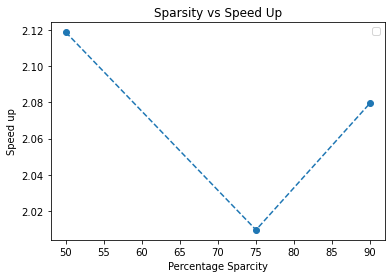

In [15]:
# Sparsity vs speed up graph (Bonus)
# line 1 points
sparsity = [50,75,90]
speedup = [speedup_prunned_50,speedup_prunned_75,speedup_prunned_90]
# plotting the line 1 points 
plt.xlabel('Percentage Sparcity')
# Set the y axis label of the current axis.
plt.ylabel('Speed up')
# Set a title of the current axes.
plt.title('Sparsity vs Speed Up')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.plot(sparsity, speedup, linestyle='--', marker='o')
plt.show()

In [16]:
# Evaluating one shot prunned model with 50 percent sparcity_ratio
resnet_one_shot_prunned_50 = load_model("one_shot_50")

resnet_one_shot_prunned_50.eval()
epoch= 1
criterion = nn.CrossEntropyLoss()

In [17]:
# Calculating various inference params for 50 percent prunned model
start_time = datetime.datetime.now()
test_inference(1,resnet_one_shot_prunned_50)

end_time = datetime.datetime.now()


time_diff = (end_time - start_time)

inference_time_prunned_50 = time_diff.total_seconds() * 1000
speedup_prunned_50 = inference_time_uprunned_model/inference_time_prunned_50
print("++++++++++++++++++++++++++++++++++++++")
print("Various Evaluation metrics for the oneshot_prunned_50 model")
print(f"Sparcity: {0.5*100} percent")
print(f"Inference time unprunned model {inference_time_uprunned_model:.2f}")
print(f"Inference time {inference_time_prunned_50:.2f}")
print(f"Speed up {speedup_prunned_50:.2f}")
print("++++++++++++++++++++++++++++++++++++++++")

++++++++++++++++++++++++++++++++++++++
Various Evaluation metrics for the oneshot_prunned_50 model
Sparcity: 50.0 percent
Inference time unprunned model 3964.84
Inference time 1923.65
Speed up 2.06
++++++++++++++++++++++++++++++++++++++++


In [18]:
# Evaluating one shot prunned model with 75 percent sparcity_ratio
resnet_one_shot_prunned_75 = load_model("one_shot_75")

resnet_one_shot_prunned_75.eval()
epoch= 1
criterion = nn.CrossEntropyLoss()

In [19]:
# Calculating various inference params for 75 percent prunned model
start_time = datetime.datetime.now()
test_inference(1,resnet_one_shot_prunned_75)
end_time = datetime.datetime.now()


time_diff = (end_time - start_time)

inference_time_prunned_75 = time_diff.total_seconds() * 1000
speedup_prunned_75 = inference_time_uprunned_model/inference_time_prunned_75
print("++++++++++++++++++++++++++++++++++++++")
print("Various Evaluation metrics for the oneshot_prunned_75 model")
print(f"Sparcity: {0.5*100} percent")
print(f"Inference time unprunned model {inference_time_uprunned_model:.2f}")
print(f"Inference time {inference_time_prunned_75:.2f}")
print(f"Speed up {speedup_prunned_75:.2f}")
print("++++++++++++++++++++++++++++++++++++++++")

++++++++++++++++++++++++++++++++++++++
Various Evaluation metrics for the oneshot_prunned_75 model
Sparcity: 50.0 percent
Inference time unprunned model 3964.84
Inference time 1916.10
Speed up 2.07
++++++++++++++++++++++++++++++++++++++++


In [20]:
# Evaluating one shot prunned model with 90 percent sparcity_ratio
resnet_one_shot_prunned_90 = load_model("one_shot_90")

resnet_one_shot_prunned_90.eval()
epoch= 1
criterion = nn.CrossEntropyLoss()

In [21]:
# Calculating various inference params for 90 percent prunned model
start_time = datetime.datetime.now()
test_inference(1,resnet_one_shot_prunned_90)

end_time = datetime.datetime.now()


time_diff = (end_time - start_time)

inference_time_prunned_90 = time_diff.total_seconds() * 1000
speedup_prunned_90 = inference_time_uprunned_model/inference_time_prunned_90
print("++++++++++++++++++++++++++++++++++++++")
print("Various Evaluation metrics for the oneshot_prunned_90 model")
print(f"Sparcity: {0.5*100} percent")
print(f"Inference time unprunned model {inference_time_uprunned_model:.2f}")
print(f"Inference time {inference_time_prunned_90:.2f}")
print(f"Speed up {speedup_prunned_90:.2f}")
print("++++++++++++++++++++++++++++++++++++++++")

++++++++++++++++++++++++++++++++++++++
Various Evaluation metrics for the oneshot_prunned_90 model
Sparcity: 50.0 percent
Inference time unprunned model 3964.84
Inference time 1915.64
Speed up 2.07
++++++++++++++++++++++++++++++++++++++++


No handles with labels found to put in legend.


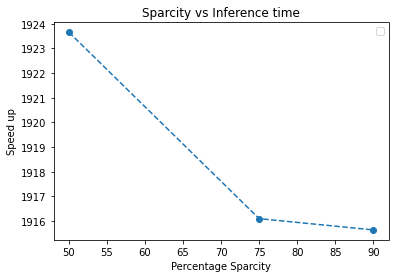

In [22]:
# Sparcity vs Inference time graph (Bonus)
# line 1 points
sparcity = [50,75,90]
inference_time = [inference_time_prunned_50,inference_time_prunned_75,inference_time_prunned_90]
# plotting the line 1 points 
plt.xlabel('Percentage Sparcity')
# Set the y axis label of the current axis.
plt.ylabel('Speed up')
# Set a title of the current axes.
plt.title('Sparcity vs Inference time')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.plot(sparcity, inference_time, linestyle='--', marker='o')
plt.show()

No handles with labels found to put in legend.


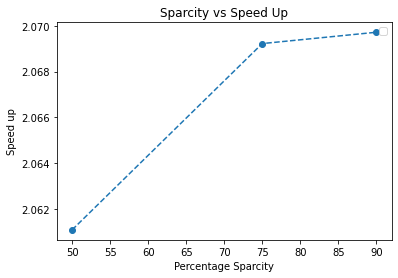

In [23]:
# Sparcity vs speed up graph (Bonus)
# line 1 points
sparcity = [50,75,90]
speedup = [speedup_prunned_50,speedup_prunned_75,speedup_prunned_90]
# plotting the line 1 points 
plt.xlabel('Percentage Sparcity')
# Set the y axis label of the current axis.
plt.ylabel('Speed up')
# Set a title of the current axes.
plt.title('Sparcity vs Speed Up')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.plot(sparcity, speedup, linestyle='--', marker='o')
plt.show()